<a href="https://colab.research.google.com/github/anik-ghosh-au7/bitcoin_notifier/blob/master/Bitcoin_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18, 6

In [0]:
dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/BTC-USD.csv")
dataset['Date'] = pd.to_datetime(dataset['Date'], infer_datetime_format=True)
indexedDataset = dataset.set_index(['Date'])

In [0]:
from datetime import  datetime
indexedDataset.head(10)

Close
Date                   
2017-01-01   998.325012
2017-01-02  1021.750000
2017-01-03  1043.839966
2017-01-04  1154.729980
2017-01-05  1013.380005
2017-01-06   902.200989
2017-01-07   908.585022
2017-01-08   911.198975
2017-01-09   902.828003
2017-01-10   907.679016

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


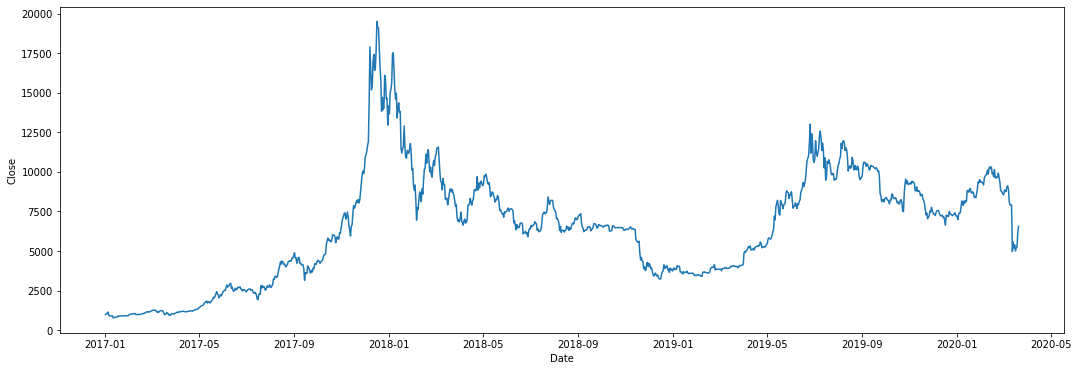

In [0]:
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(indexedDataset)

In [0]:
rolmean = indexedDataset.rolling(window=365).mean()
rolstd = indexedDataset.rolling(window=365).std()
print(rolmean, rolstd)

                  Close
Date                   
2017-01-01          NaN
2017-01-02          NaN
2017-01-03          NaN
2017-01-04          NaN
2017-01-05          NaN
...                 ...
2020-03-16  8420.497792
2020-03-17  8423.766620
2020-03-18  8426.964560
2020-03-19  8432.728167
2020-03-20  8439.664004

[1175 rows x 1 columns]                   Close
Date                   
2017-01-01          NaN
2017-01-02          NaN
2017-01-03          NaN
2017-01-04          NaN
2017-01-05          NaN
...                 ...
2020-03-16  1943.812110
2020-03-17  1937.405391
2020-03-18  1931.154421
2020-03-19  1921.281541
2020-03-20  1909.877231

[1175 rows x 1 columns]


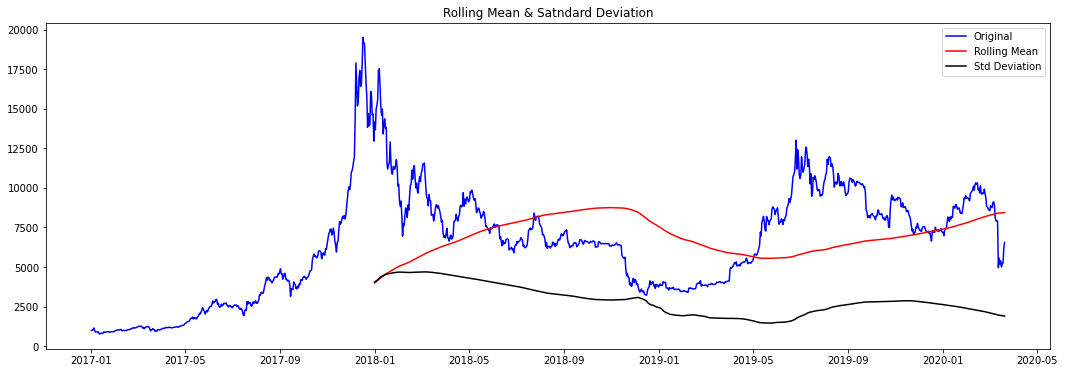

In [0]:
org = plt.plot(indexedDataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Std Deviation')
plt.legend(loc='best')
plt.title('Rolling Mean & Satndard Deviation')
plt.show(block=False)

In [0]:
from statsmodels.tsa.stattools import adfuller
print("Result of Dickey-Fuller Test :")
dftest = adfuller(indexedDataset['Close'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Result of Dickey-Fuller Test :
Test Statistic                   -2.541349
p-value                           0.105735
#Lags Used                       20.000000
Number of Observations Used    1154.000000
Critical Value (1%)              -3.436029
Critical Value (5%)              -2.864048
Critical Value (10%)             -2.568105
dtype: float64


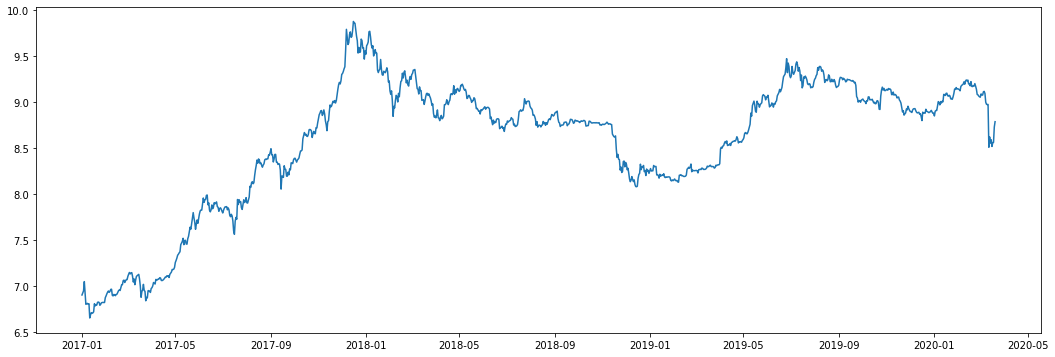

In [0]:
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

In [0]:
movingAverage = indexedDataset_logScale.rolling(window=365).mean()
movingStd = indexedDataset_logScale.rolling(window=365).std()
print(rolmean, rolstd)

                  Close
Date                   
2017-01-01          NaN
2017-01-02          NaN
2017-01-03          NaN
2017-01-04          NaN
2017-01-05          NaN
...                 ...
2020-03-16  8420.497792
2020-03-17  8423.766620
2020-03-18  8426.964560
2020-03-19  8432.728167
2020-03-20  8439.664004

[1175 rows x 1 columns]                   Close
Date                   
2017-01-01          NaN
2017-01-02          NaN
2017-01-03          NaN
2017-01-04          NaN
2017-01-05          NaN
...                 ...
2020-03-16  1943.812110
2020-03-17  1937.405391
2020-03-18  1931.154421
2020-03-19  1921.281541
2020-03-20  1909.877231

[1175 rows x 1 columns]


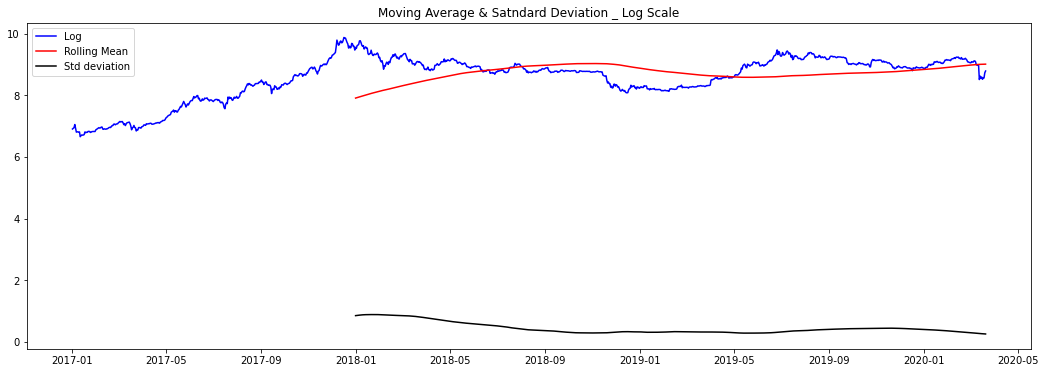

In [0]:
org_log = plt.plot(indexedDataset_logScale, color='blue', label='Log')
moving_average = plt.plot(movingAverage, color='red', label='Rolling Mean')
moving_std = plt.plot(movingStd, color='black', label='Std deviation')
plt.legend(loc='best')
plt.title('Moving Average & Satndard Deviation _ Log Scale')
plt.show(block=False)

In [0]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(10)

datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

Close
Date                
2017-12-31  1.647537
2018-01-01  1.604470
2018-01-02  1.689702
2018-01-03  1.696869
2018-01-04  1.715595
2018-01-05  1.818746
2018-01-06  1.816196
2018-01-07  1.746516
2018-01-08  1.656136
2018-01-09  1.609891

In [0]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeSeries):
  movingAverage = timeSeries.rolling(window=365).mean()
  movingStd = timeSeries.rolling(window=365).std() 

  org = plt.plot(timeSeries, color='blue', label='Original')
  mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
  std = plt.plot(movingStd, color='black', label='Std Deviation')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Satndard Deviation')
  plt.show(block=False)

  print("Result of Dickey-Fuller Test :")
  dftest = adfuller(timeSeries['Close'], autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
  for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)

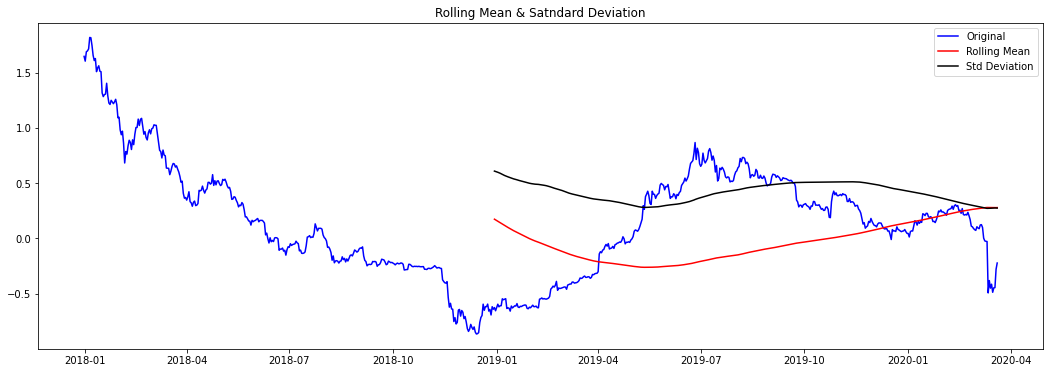

Result of Dickey-Fuller Test :
Test Statistic                  -3.066527
p-value                          0.029132
#Lags Used                       2.000000
Number of Observations Used    808.000000
Critical Value (1%)             -3.438469
Critical Value (5%)             -2.865124
Critical Value (10%)            -2.568678
dtype: float64


In [0]:
test_stationarity(datasetLogScaleMinusMovingAverage)

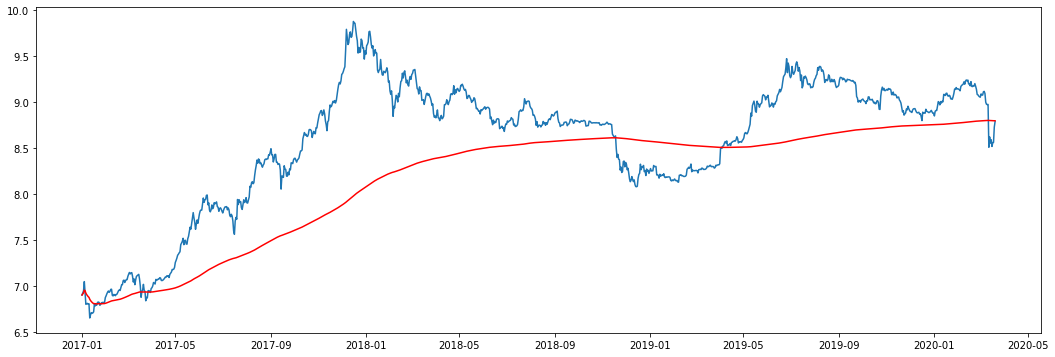

In [0]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=365, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

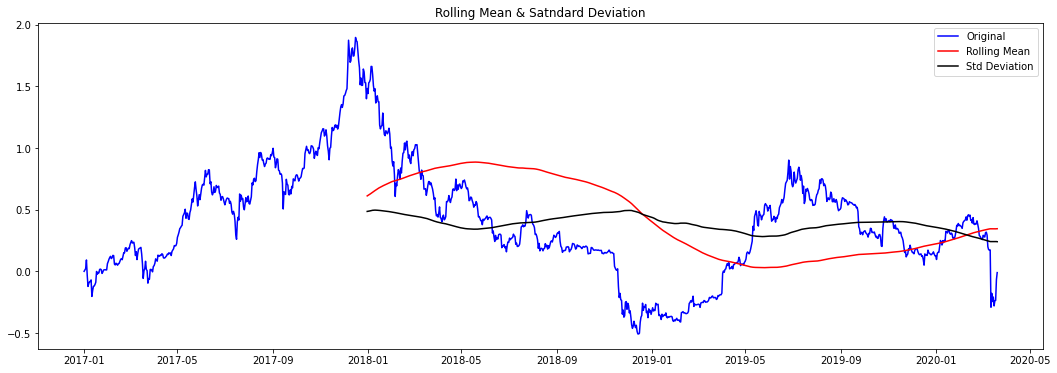

Result of Dickey-Fuller Test :
Test Statistic                   -1.698434
p-value                           0.431920
#Lags Used                        0.000000
Number of Observations Used    1174.000000
Critical Value (1%)              -3.435932
Critical Value (5%)              -2.864005
Critical Value (10%)             -2.568082
dtype: float64


In [0]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

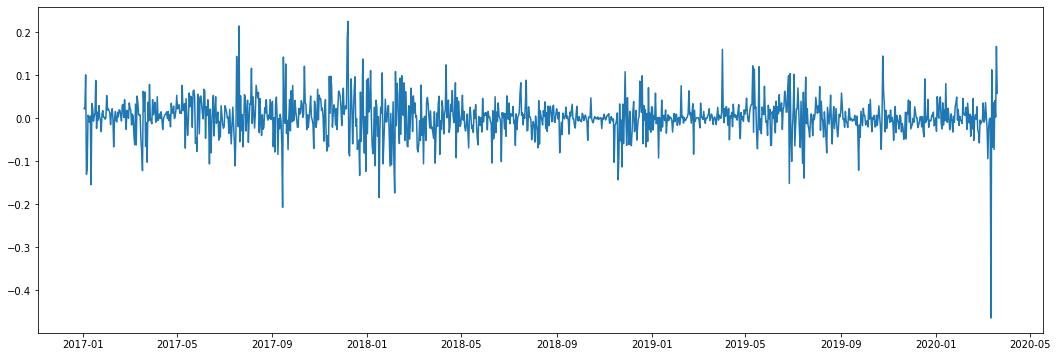

In [0]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

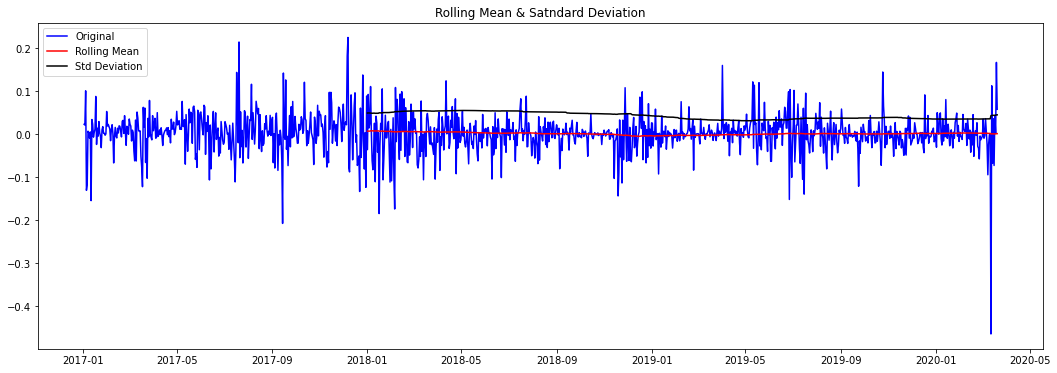

Result of Dickey-Fuller Test :
Test Statistic                  -23.247874
p-value                           0.000000
#Lags Used                        1.000000
Number of Observations Used    1172.000000
Critical Value (1%)              -3.435942
Critical Value (5%)              -2.864009
Critical Value (10%)             -2.568085
dtype: float64


In [0]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

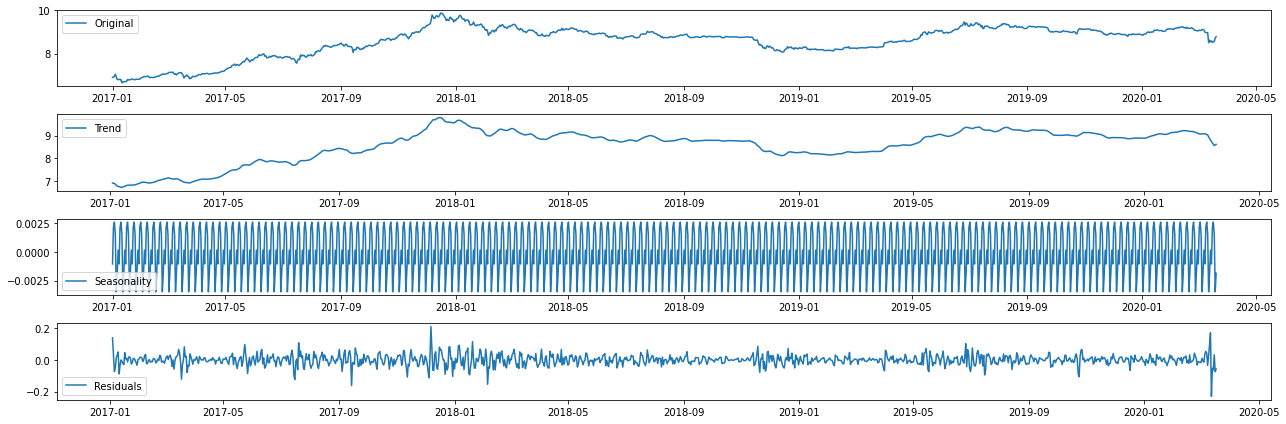

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

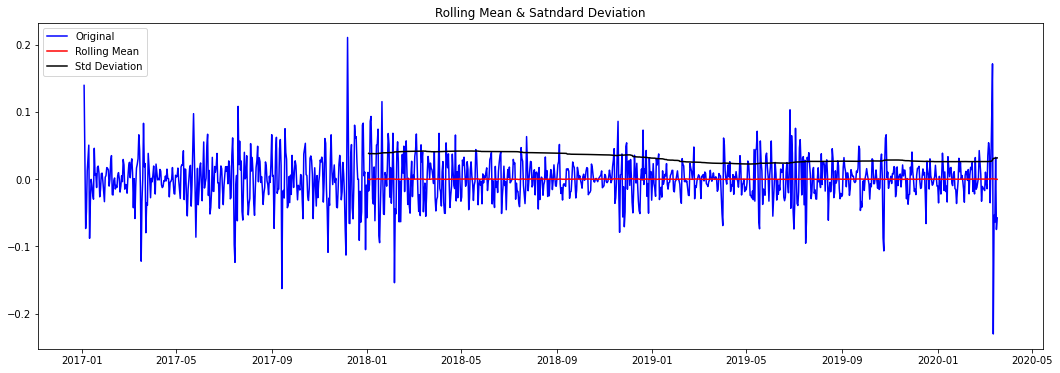

Result of Dickey-Fuller Test :
Test Statistic                -1.480136e+01
p-value                        2.097078e-27
#Lags Used                     1.500000e+01
Number of Observations Used    1.153000e+03
Critical Value (1%)           -3.436034e+00
Critical Value (5%)           -2.864050e+00
Critical Value (10%)          -2.568106e+00
dtype: float64


In [0]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


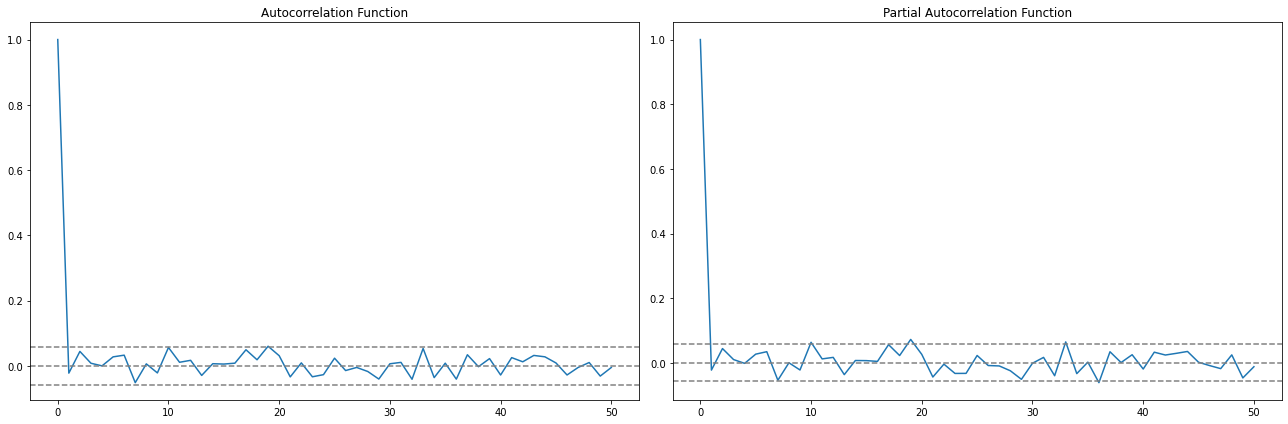

In [0]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(datasetLogDiffShifting, nlags=50)
lag_pacf = pacf(datasetLogDiffShifting, nlags=50, method='ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Plotting AR model


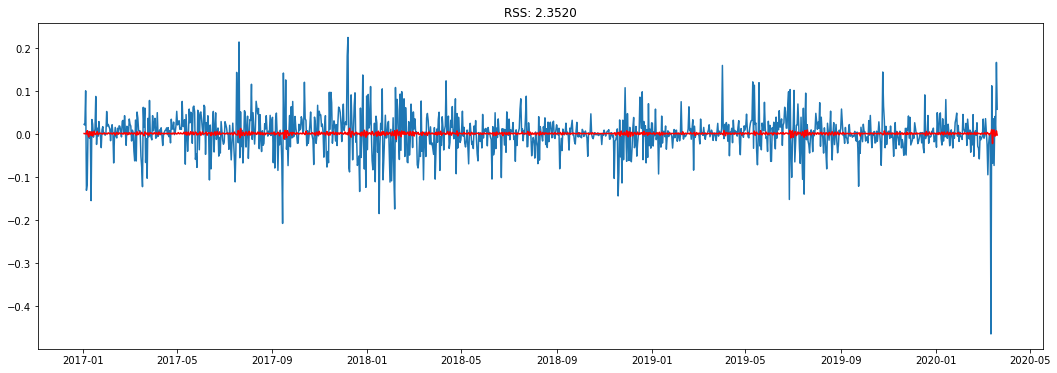

In [0]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(indexedDataset_logScale, order=(3, 1, 2))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - datasetLogDiffShifting["Close"])**2))
print('Plotting AR model')

In [0]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2017-01-02    0.001608
2017-01-03    0.001134
2017-01-04    0.002107
2017-01-05    0.000425
2017-01-06    0.008228
dtype: float64


In [0]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2017-01-02    0.001608
2017-01-03    0.002742
2017-01-04    0.004849
2017-01-05    0.005274
2017-01-06    0.013502
dtype: float64


In [0]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['Close'].iloc[0], index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Date
2017-01-01    6.906079
2017-01-02    6.907687
2017-01-03    6.908821
2017-01-04    6.910928
2017-01-05    6.911353
dtype: float64

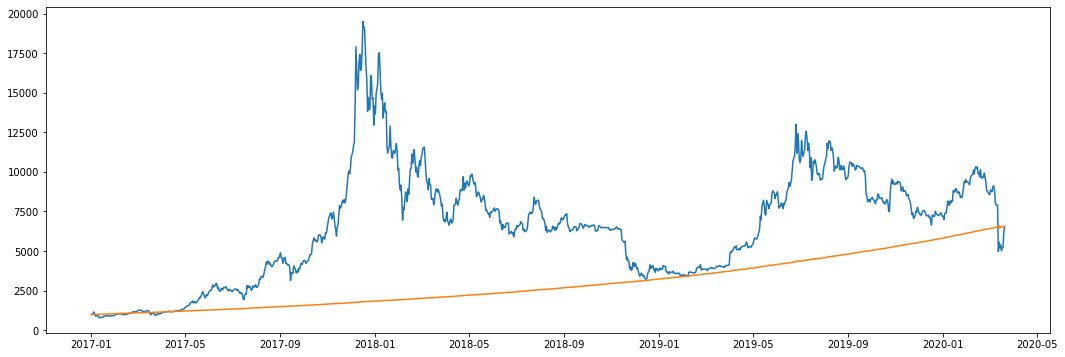

In [0]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

In [0]:
indexedDataset_logScale

Close
Date                
2017-01-01  6.906079
2017-01-02  6.929272
2017-01-03  6.950661
2017-01-04  7.051622
2017-01-05  6.921047
...              ...
2020-03-16  8.520085
2020-03-17  8.561331
2020-03-18  8.563779
2020-03-19  8.730883
2020-03-20  8.788884

[1175 rows x 1 columns]

Text(0, 0.5, 'price in USD / 1000')

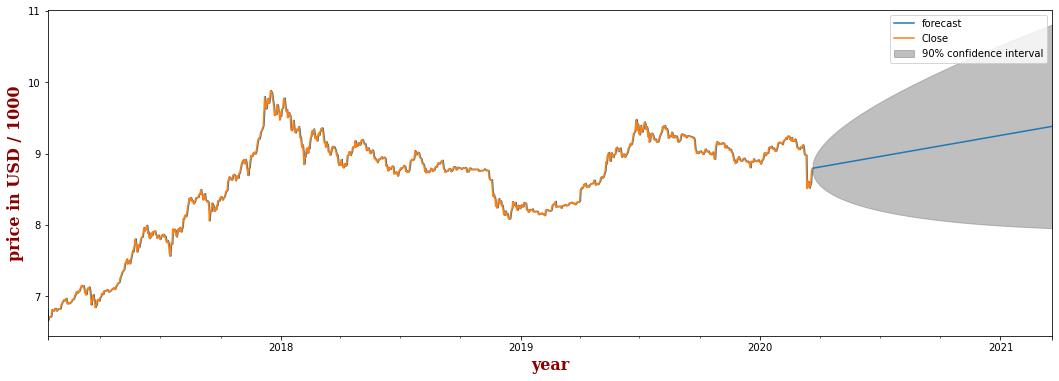

In [0]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 16,
        }
results_AR.plot_predict(10, 1540, alpha=0.1)
plt.xlabel('year', fontdict=font)
plt.ylabel('price in USD / 1000', fontdict=font)

In [0]:
results_AR.forecast(steps=30)

(array([8.79308658, 8.79932369, 8.79779284, 8.79863426, 8.80240348,
        8.80322037, 8.80408191, 8.80654544, 8.80808459, 8.80926004,
        8.81114921, 8.81283796, 8.81424593, 8.81592206, 8.81760231,
        8.81913247, 8.82074465, 8.82239348, 8.82397652, 8.82557632,
        8.82720297, 8.8288053 , 8.83040649, 8.83202172, 8.83362969,
        8.835234  , 8.83684437, 8.83845335, 8.84005978, 8.8416684 ]),
 array([0.04475899, 0.06264471, 0.0776123 , 0.09013855, 0.10063401,
        0.11037997, 0.11943324, 0.12767639, 0.13546017, 0.14288226,
        0.14988353, 0.15656988, 0.1630106 , 0.16919204, 0.17514863,
        0.18092028, 0.18651092, 0.19193439, 0.19721247, 0.20235319,
        0.20736442, 0.21225838, 0.21704257, 0.22172272, 0.22630626,
        0.23079915, 0.23520595, 0.23953166, 0.24378079, 0.24795704]),
 array([[8.70536057, 8.88081259],
        [8.67654231, 8.92210507],
        [8.64567552, 8.94991016],
        [8.62196595, 8.97530257],
        [8.60516444, 8.99964252],
        [8